<a href="https://colab.research.google.com/github/zidanematheus/exemplo-colaboratory/blob/main/Projeto_Unicornios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Ler os dados

Base_Dados = pd.read_csv('unicorns till sep 2022.csv')

# Verificar dimensão

Base_Dados.shape

(1186, 7)

In [ ]:
# Primeiros registros

Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
# Verificar colunas existentes

Base_Dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [ ]:
# Renomear

Base_Dados.rename( columns={
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($B)',
    'Date Joined' : 'Data de adesão',
    'Country' : 'País',
    'City' : 'Cidade',
    'Industry' : 'Setor',
    'Select Investors' : 'Investidores',
    }, inplace = True)

In [ ]:
# Verificar Tipo de informação

Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valor ($B)      1186 non-null   object
 2   Data de adesão  1186 non-null   object
 3   País            1186 non-null   object
 4   City            1186 non-null   object
 5   Setor           1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [ ]:
# Campos nulos

Base_Dados.isnull().sum()

Empresa            0
Valor ($B)         0
Data de adesão     0
País               0
City               0
Setor              0
Investors         18
dtype: int64

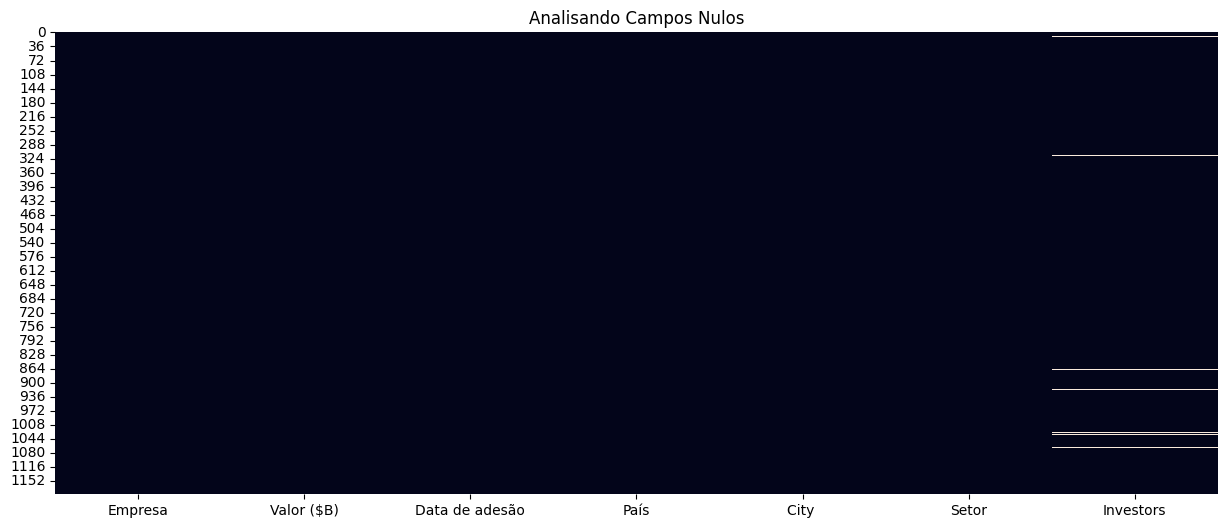

In [ ]:
# Grafica

plt.figure( figsize=(15,6 ) )
plt.title('Analisando Campos Nulos')
sns.heatmap( Base_Dados.isnull(), cbar=False );

In [ ]:
# Campos Únicos

Base_Dados.nunique()

Empresa           1183
Valor ($B)         222
Data de adesão     695
País                48
City               286
Setor               34
Investors         1152
dtype: int64

In [ ]:
# Valores Únicos

Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [ ]:
# Valores Únicos - Rank

Base_Dados['Setor'].value_counts

Fintech                                                               0.201518
Internet software & services                                          0.188870
E-commerce & direct-to-consumer                                       0.086847
Health                                                                0.079258
Artificial intelligence                                               0.062395
Supply chain, logistics, & delivery                                   0.054806
Other                                                                 0.054806
Cybersecurity                                                         0.048904
Data management & analytics                                           0.037943
Auto & transportation                                                 0.033727
Hardware                                                              0.032040
Mobile & telecommunications                                           0.031197
Edtech                                              

In [ ]:
# Valores Únicos - Rank

Base_Dados['Setor'].value_counts( normalize=True)

Fintech                                                               0.201518
Internet software & services                                          0.188870
E-commerce & direct-to-consumer                                       0.086847
Health                                                                0.079258
Artificial intelligence                                               0.062395
Supply chain, logistics, & delivery                                   0.054806
Other                                                                 0.054806
Cybersecurity                                                         0.048904
Data management & analytics                                           0.037943
Auto & transportation                                                 0.033727
Hardware                                                              0.032040
Mobile & telecommunications                                           0.031197
Edtech                                              

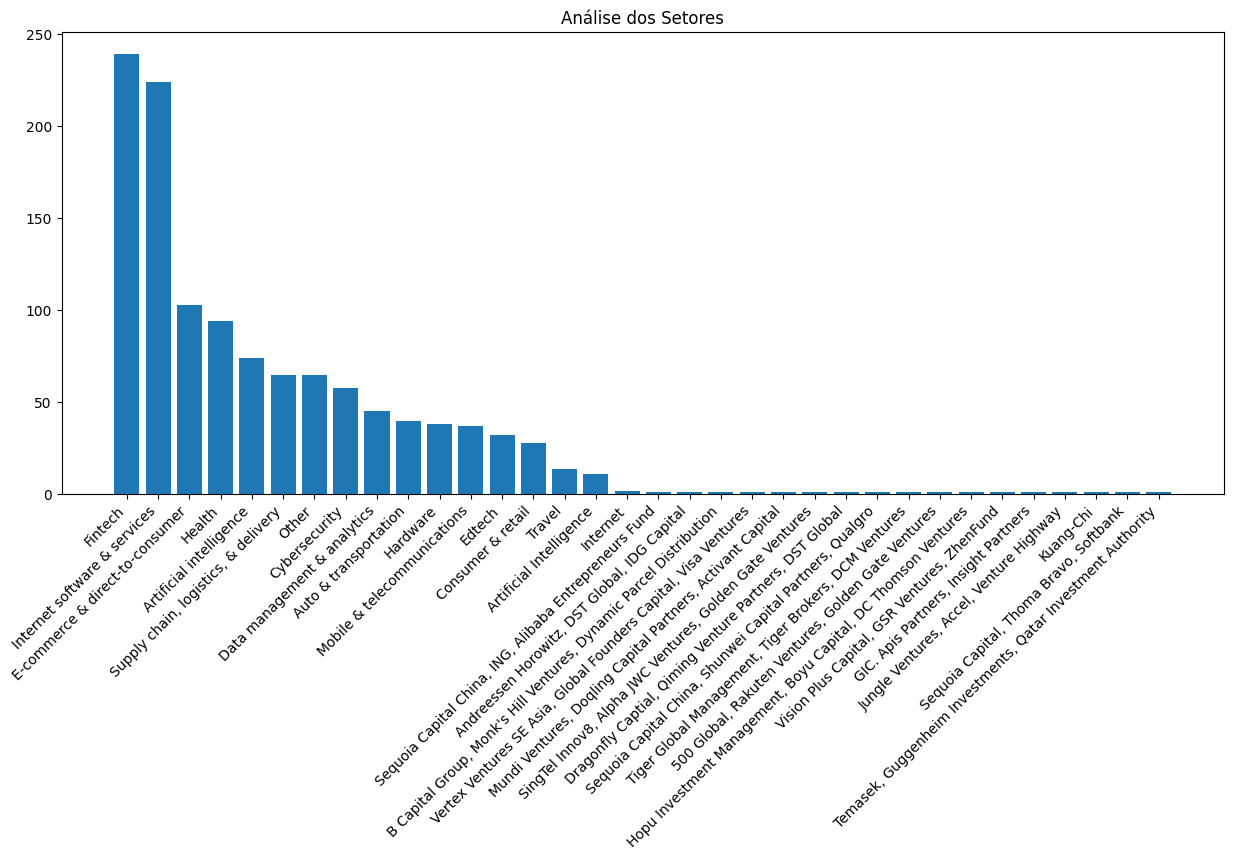

In [ ]:
plt.figure( figsize=(15,6))
plt.title('Análise dos Setores')
plt.bar( Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts() )
plt.xticks( rotation=45, ha='right');

In [ ]:
Analise = round( Base_Dados['País'].value_counts( normalize=True ) * 100, 1 )

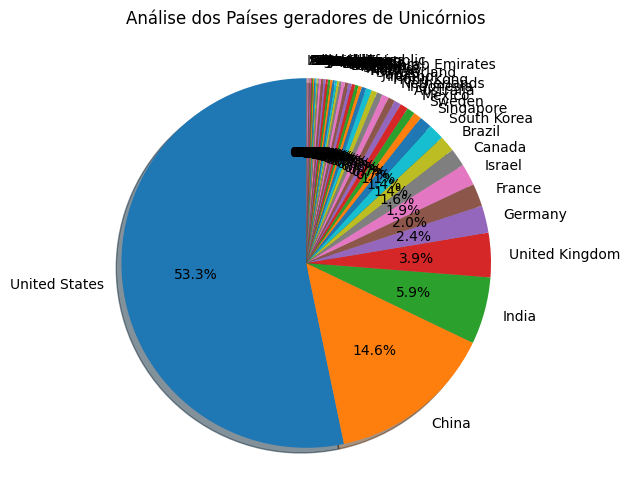

In [ ]:
# Plot Geral dos Países

plt.figure( figsize=(15,6) )
plt.title('Análise dos Países geradores de Unicórnios')
plt.pie(
    Analise,
    labels = Analise.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

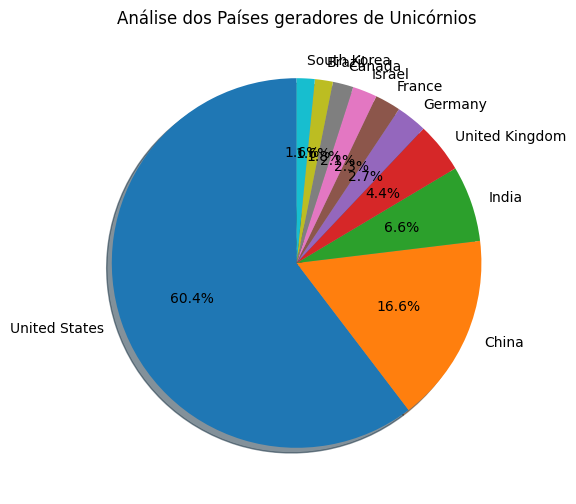

In [ ]:
# Plot Geral dos Países

plt.figure( figsize=(15,6) )
plt.title('Análise dos Países geradores de Unicórnios - Top 10')
plt.pie(
    Analise.head(10),
    labels = Analise.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [ ]:
# Conversão de Objeto para Data
Base_Dados['Data de adesão'] = pd.to_datetime( Base_Dados['Data de adesão' ])

Base_Dados['Data de adesão'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Data de adesão, dtype: datetime64[ns]

In [ ]:
# Extrair Ano e Mês

Base_Dados['Mês'] = pd.DatetimeIndex( Base_Dados['Data de adesão'] ).month
Base_Dados['Ano'] = pd.DatetimeIndex( Base_Dados['Data de adesão'] ).year

Base_Dados.head()

,Empresa,Valor ($B),Data de adesão,País,City,Setor,Investors,Mês,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
# Tabela Analítica

Analise_Agrupada = Base_Dados.groupby( by=['País', 'Ano', 'Mês', 'Empresa'] ).count().reset_index()

Analise_Agrupada

,País,Ano,Mês,Empresa,Valor ($B),Data de adesão,City,Setor,Investors
0,Argentina,2021,8,Uala,1,1,1,1,1
1,Australia,2018,1,Canva,1,1,1,1,1
2,Australia,2019,3,Airwallex,1,1,1,1,1
3,Australia,2021,5,SafetyCulture,1,1,1,1,1
4,Australia,2021,7,Culture Amp,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
1181,United States,2022,8,Flow,1,1,1,1,1
1182,United States,2022,8,Incredible Health,1,1,1,1,1
1183,United States,2022,8,Orna Therapeutics,1,1,1,1,1
1184,Vietnam,2021,10,Sky Mavis,1,1,1,1,1


In [ ]:
Analise_Agrupada.loc[
    Analise_Agrupada['País'] == 'Brazil'
]

,País,Ano,Mês,Empresa,Valor ($B),Data de adesão,City,Setor,Investors
16,Brazil,2018,7,Movile,1,1,1,1,1
17,Brazil,2018,11,iFood,1,1,1,1,1
18,Brazil,2019,6,Loggi,1,1,1,1,1
19,Brazil,2019,9,QuintoAndar,1,1,1,1,1
20,Brazil,2019,10,EBANX,1,1,1,1,1
21,Brazil,2019,12,Wildlife Studios,1,1,1,1,1
22,Brazil,2020,1,Loft,1,1,1,1,1
23,Brazil,2020,12,C6 Bank,1,1,1,1,1
24,Brazil,2020,12,Creditas,1,1,1,1,1
25,Brazil,2021,1,MadeiraMadeira,1,1,1,1,1


In [ ]:
# Transformando a coluna valor

Base_Dados['Valor ($B)'] = pd.to_numeric( Base_Dados['Valor ($B)'].apply( lambda Linha: Linha.replace('$', '') ) )

Base_Dados.head()

,Empresa,Valor ($B),Data de adesão,País,City,Setor,Investors,Mês,Ano
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
# Tabela Analitica

Analise_País = Base_Dados.groupby( by=['País'] ).sum()['Valor ($B)'].reset_index()

Analise_País.head()

,País,Valor ($B)
0,Argentina,2.45
1,Australia,54.40
2,Austria,7.61
3,Bahamas,32.00
4,Belgium,8.95


In [ ]:
Analise_Valor = Analise_País.sort_values('Valor ($B)', ascending=False)

Analise_Valor.head()

,País,Valor ($B)
46,United States,2069.89
9,China,678.59
45,United Kingdom,205.45
20,India,202.92
18,Germany,80.88


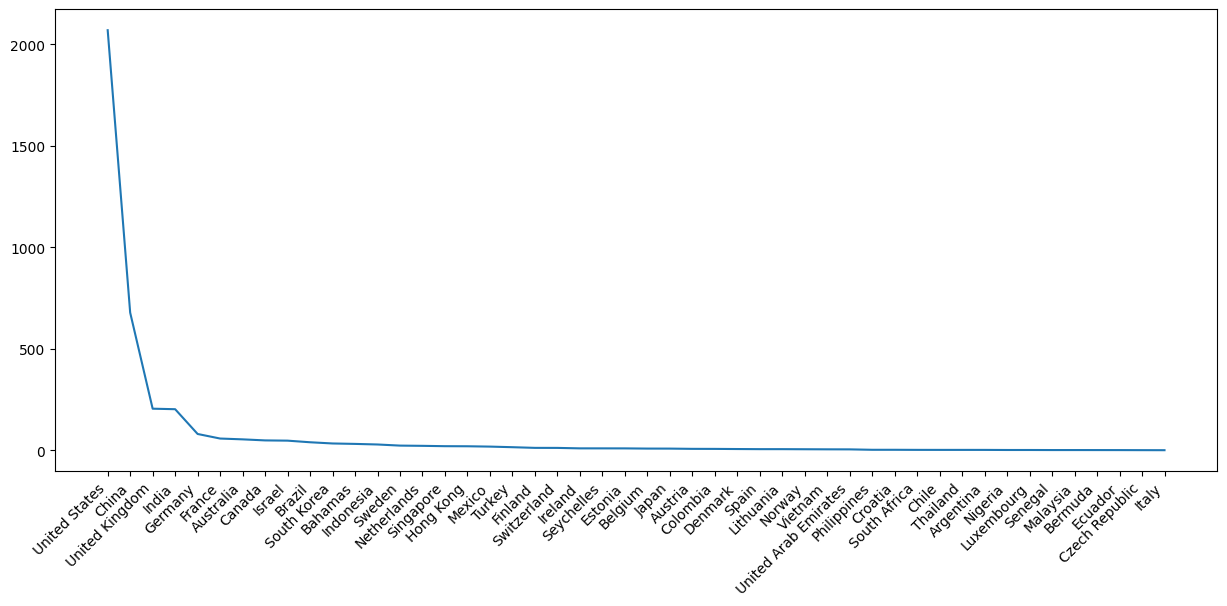

In [ ]:
plt.figure( figsize=(15,6) )
plt.plot( Analise_Valor['País'], Analise_Valor['Valor ($B)'])
plt.xticks( rotation=45, ha='right');